# Day02_02_unstructured_data
<font size=5><b>OpenCV<b></font>
<div align='right'>류 회 성(Hoe Sung Ryu)</div>

 
 
   

     
<img src='https://pyimagesearch.com/wp-content/uploads/2018/05/opencv_tutorial_header.jpg'>
    
    
---
    
    

In [1]:
from google.colab import drive # 드라이브 연동
drive.mount('/content/gdrive')
!pwd # 현재경로확인

Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/My Drive/') # DataPath 설정 

In [5]:
# 현재 디렉토리에 폴더만들기 
!mkdir opencv_example

In [6]:
os.chdir('/content/gdrive/My Drive/opencv_example') # DataPath 설정 

In [7]:
# 데이터 가져오기 
!git clone https://github.com/hoesungryu/NIA_2022_AI_for_highschoolstudent

Cloning into 'NIA_2022_AI_for_highschoolstudent'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 22 (delta 3), reused 19 (delta 3), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [8]:
os.chdir('/content/gdrive/My Drive/opencv_example/NIA_2022_AI_for_highschoolstudent') # DataPath 설정 

In [9]:
# 잘 다운 받았는지확인
!ls ./

cv2_imgs  data	README.md


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [11]:
def raw_pixel(rimg):
    roi  = cv2.cvtColor(rimg, cv2.COLOR_BGR2GRAY)
    # the extent variable is important for ensuring the right
    # kind of plotting area!
    extent = (0, 15, 0, 15)  # change to see that it works
    plt.figure(None, figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(rimg, extent=extent,)
    ax = plt.gca()
    
    # this makes sure we have the correct grid lines
    major_ticks = np.arange(0, 16, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.imshow(rimg,extent=extent,)
    ax = plt.gca()
    major_ticks = np.arange(0, 16, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)

    # plots pixel intensity values with text color depending on
    # the pixel value
    for i in range(0, 15):
        for j in range(0, 15):
            if roi[j, i] > 127:
                plt.text(i+0.1, j+0.6, str(roi[j, i]), color='black')
            else:
                plt.text(i+0.1, j+0.6, str(roi[j, i]), color='white')

    plt.grid(True)

In [12]:
def find_face(img):
    # haarcascade 불러오기
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert color
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 얼굴 찾기
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # 이미지 출력
    plt.figure(None, figsize=(16, 16))
    plt.imshow(img)
    return None 

## 이미지 불러오기

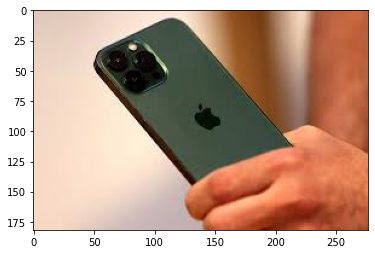

In [19]:
image = cv2.imread('./cv2_imgs/iphone_13.jpg')
# jpg: 배경이불투명 // jpeg: jpg를 압축 // png: 배경이 투명
# 포켓몬 VS 디지몬 구별하는 인공지능
# 100%
# 포켓몬사진 jpg, 디지몬 사진 png
# 의료현장
# 심장병 나타날 가능성 인공지능 모델
# 심장 엑스레이 (수술 흉터를 확인해서 구별)
# 100%
# XAI 인공지능을 해석

mrimg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert color
plt.figure(None, figsize=(6, 6))
plt.imshow(mrimg)
plt.show()

## 이미지 구성

<img src='https://www.researchgate.net/profile/Bhupendra-Pratap-Singh/publication/282798184/figure/fig15/AS:283989639221249@1444719814399/Color-image-representation-and-RGB-matrix.png'>


<img src='https://www.researchgate.net/profile/Jane-Courtney/publication/267210444/figure/fig6/AS:295732335661069@1447519491773/A-three-dimensional-RGB-matrix-Each-layer-of-the-matrix-is-a-two-dimensional-matrix.png'>

In [23]:
mrimg.shape # height, width, color 

(182, 277)


In [24]:
print(mrimg[:,:,0].shape) # RED
print(mrimg[:,:,1].shape) # Green
print(mrimg[:,:,2].shape) # Blue

(182, 277)
(182, 277)
(182, 277)


## 이미지 자르기

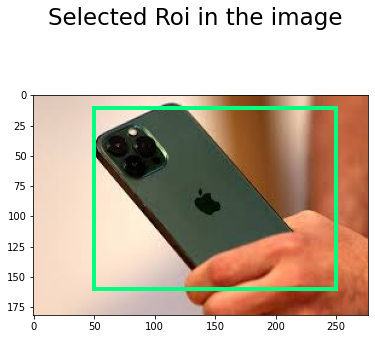

In [25]:
# Create figure and axes
# Create a Rectangle patch
# xy, width, height 
# (xy)------------------+
# |                  |
# height             |
# |                  |
# +--- width ----+

fig, ax = plt.subplots(figsize=(6,6)) # 그림 그리기
fig.suptitle("Selected Roi in the image",fontsize=23, y=0.96) # 제목

# Display the image
ax.imshow(mrimg)
rect = mpl.patches.Rectangle((50, 10), 200, 150, linewidth=4, edgecolor='springgreen', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

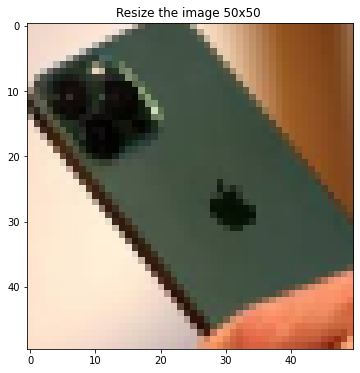

In [26]:
roi = mrimg[10:150, 50:200] # cut face region 
roi = cv2.resize(roi, (50, 50), interpolation=cv2.INTER_AREA)  # resize image

plt.figure(None, figsize=(6, 6))
plt.title("Resize the image 50x50 ")
plt.imshow(roi)

## 이미지 구성 살펴보기

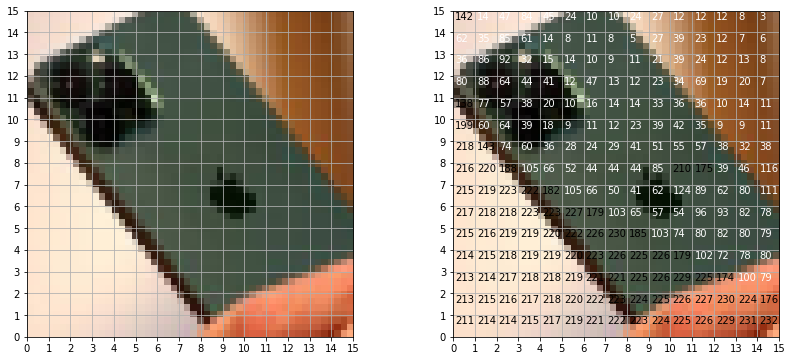

In [27]:
raw_pixel(roi)

## 이미지 블러링

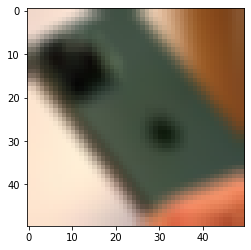

In [28]:
# blur() : 각 픽셀에 커널 개수의 역수를 곱하여 모두 더함
image_blurry = cv2.blur(roi, (5,5)) # 5 x 5 커널 평균값으로 이미지를 흐리게 함 

plt.imshow(image_blurry, cmap='gray')
plt.show()

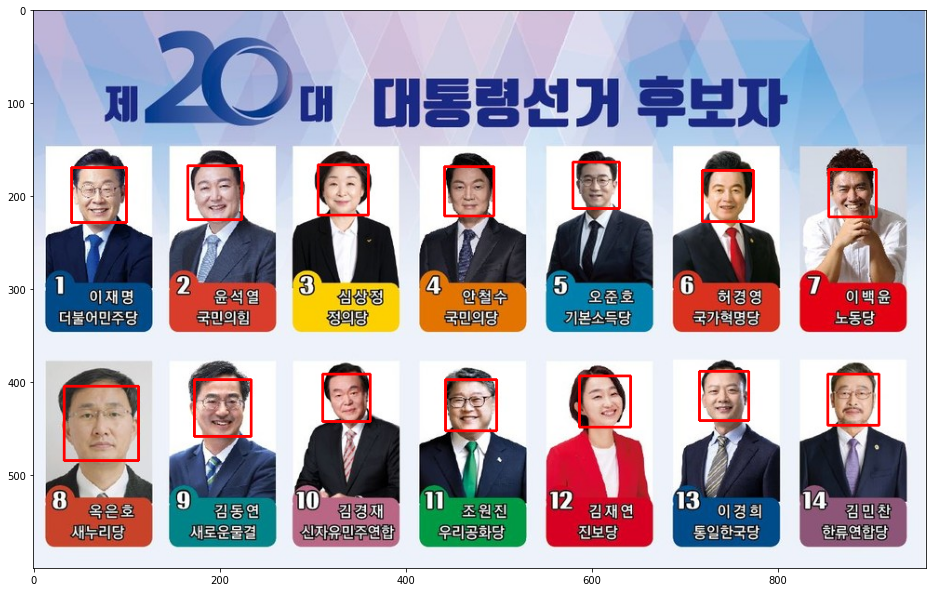

In [29]:
# 이미지 불러오기
img = cv2.imread('./cv2_imgs/20_candidates.jpg')
find_face(img)

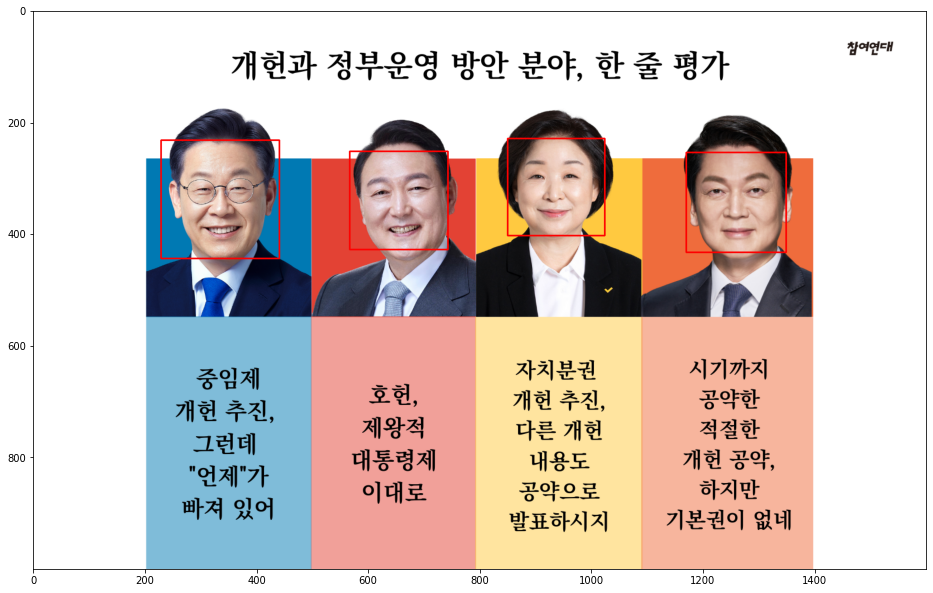

In [30]:
# 이미지 불러오기
img = cv2.imread('./cv2_imgs/practice_face.png')
find_face(img)

In [36]:
from google.colab import files
f = files.upload()

In [33]:
!wget https://t1.daumcdn.net/cfile/tistory/998C15395D91B87608

--2022-06-18 05:38:03--  https://t1.daumcdn.net/cfile/tistory/998C15395D91B87608
Resolving t1.daumcdn.net (t1.daumcdn.net)... 23.12.145.61, 23.12.145.56, 2600:1408:8c00::17dd:48c0, ...
Connecting to t1.daumcdn.net (t1.daumcdn.net)|23.12.145.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78481 (77K) [image/jpeg]
Saving to: ‘998C15395D91B87608’

998C15395D91B87608  100%[===================>]  76.64K  --.-KB/s    in 0.02s   

2022-06-18 05:38:05 (4.13 MB/s) - ‘998C15395D91B87608’ saved [78481/78481]



In [37]:
!ls

202001220402_11170924119205_1.jpg  998C15395D91B87608.jpeg  data
998C15395D91B87608		   cv2_imgs		    README.md


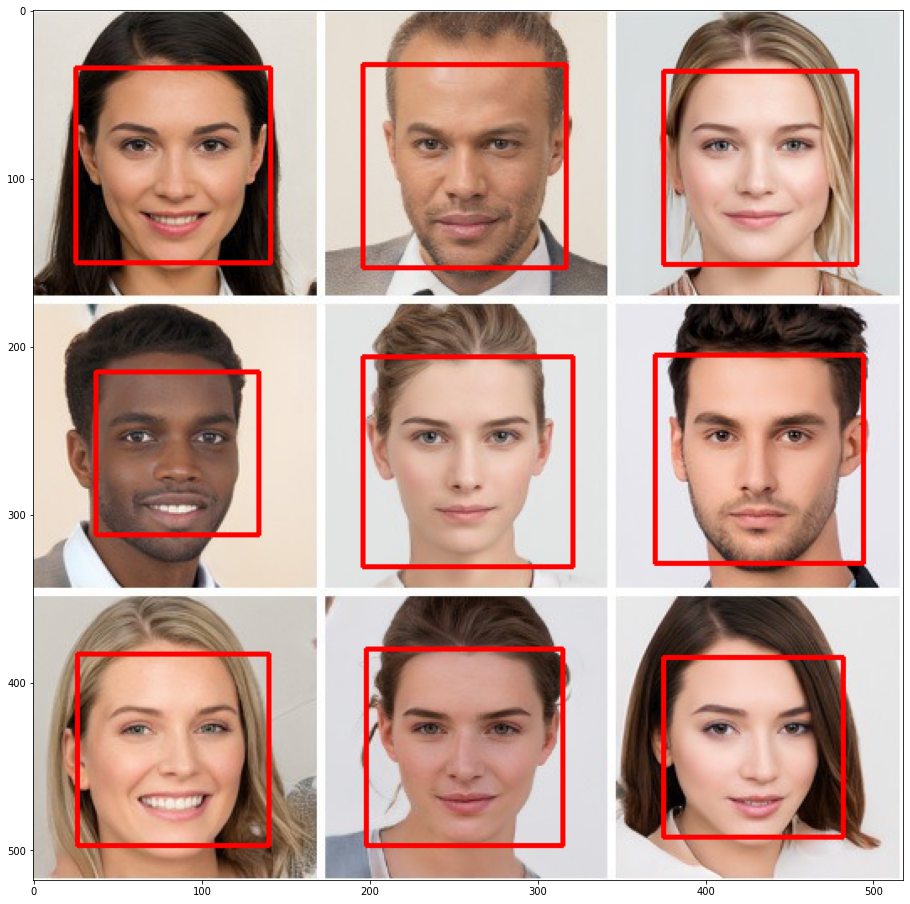

In [38]:
# 이미지 불러오기
img = cv2.imread('998C15395D91B87608')
find_face(img)